In [ ]:
#импортирование нужных библиотек
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

from scipy import stats
import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [ ]:
df= pd.read_csv('/content/Telco_Customer_Churn.csv')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
customerID,0
DeviceProtection,0
TotalCharges,0
MonthlyCharges,0
PaymentMethod,0
PaperlessBilling,0
Contract,0
StreamingMovies,0
StreamingTV,0
TechSupport,0


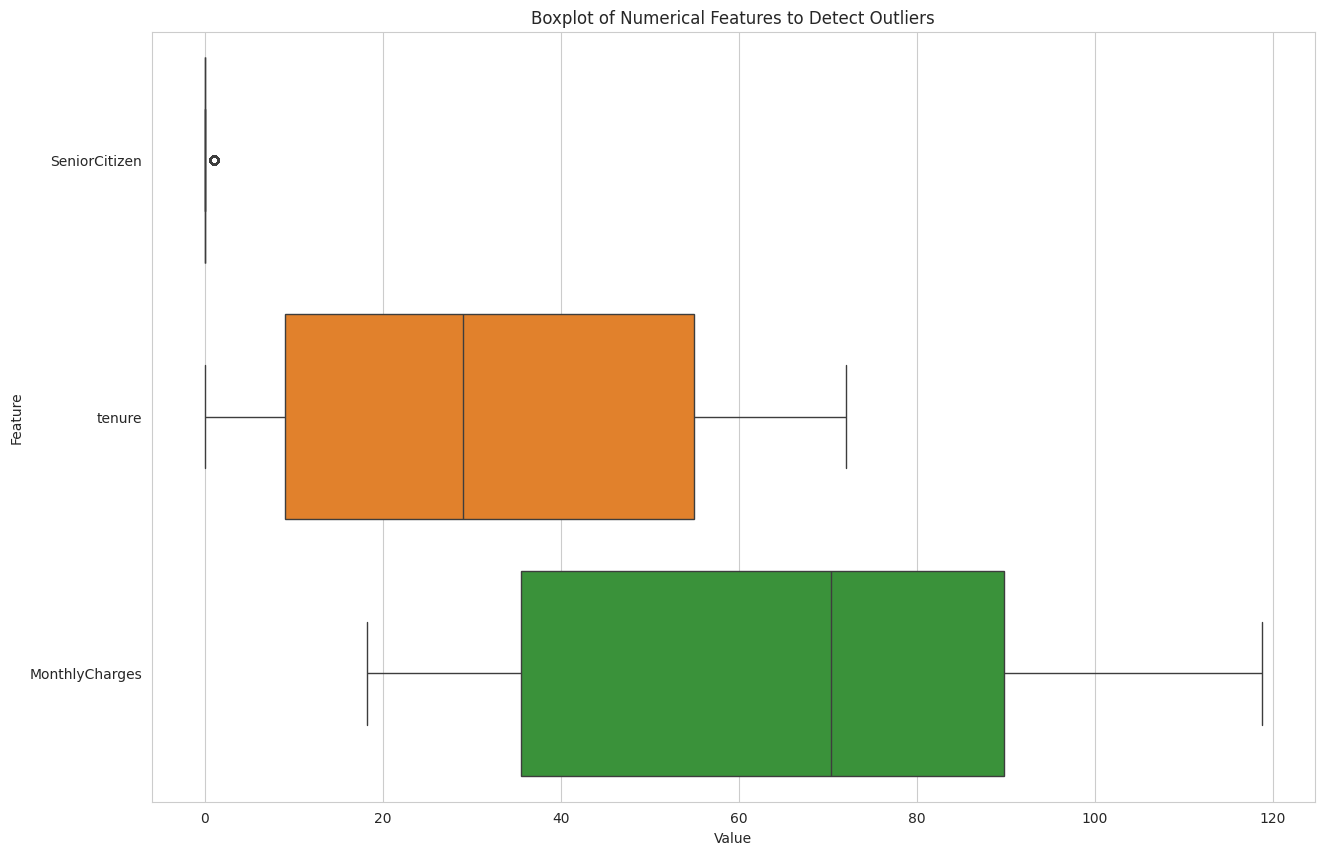

In [ ]:
numerical_features = ["SeniorCitizen", "tenure", "MonthlyCharges"]

plt.figure(figsize=(15,10))
sns.boxplot(data=df[numerical_features], orient="h")
plt.title('Boxplot of Numerical Features to Detect Outliers') #показ boxplot для определения выбросов
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

In [ ]:
#было решено удалить customerID колонну
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#некоторые пустые данные могут быть в виде пустых полей, например в колонне TotalCharges
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


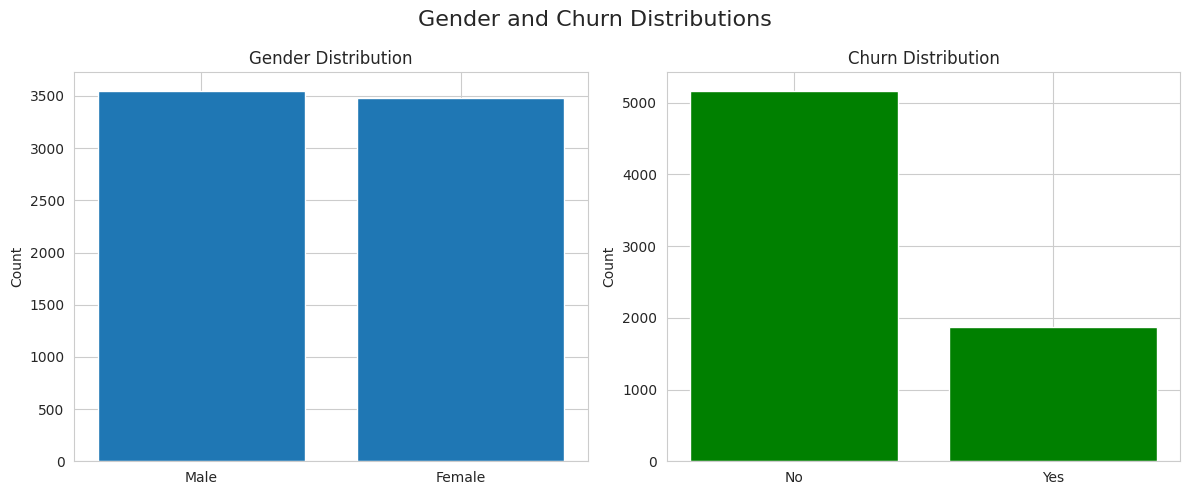

In [ ]:
import matplotlib.pyplot as plt

# Создание фигуры с двумя расположенными рядом подзаголовками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Построение график гендерного распределения
gender_counts = df['gender'].value_counts()
ax1.bar(gender_counts.index, gender_counts.values)
ax1.set_title('Gender Distribution')
ax1.set_ylabel('Count')

# Распределение оттока на графике
churn_counts = df['Churn'].value_counts()
ax2.bar(churn_counts.index, churn_counts.values, color='green')
ax2.set_title('Churn Distribution')
ax2.set_ylabel('Count')


fig.suptitle('Gender and Churn Distributions', fontsize=16)

plt.tight_layout()

plt.show()

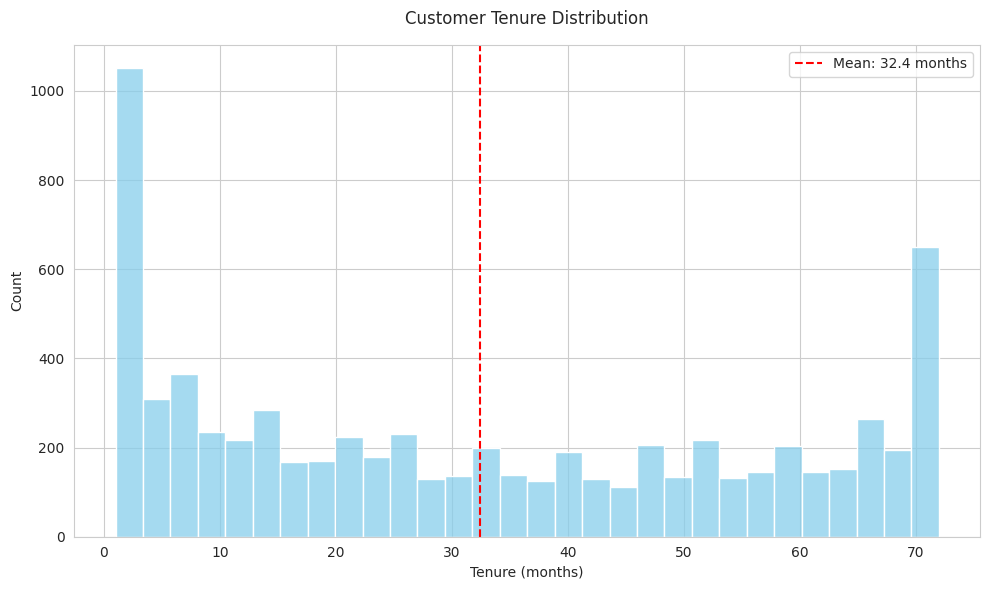

In [ ]:
plt.figure(figsize=(10, 6))

# Создание графика распределение
sns.histplot(data=df, x='tenure', bins=30, color='skyblue')

plt.title('Customer Tenure Distribution', fontsize=12, pad=15)
plt.xlabel('Tenure (months)')
plt.ylabel('Count')

plt.axvline(df['tenure'].mean(), color='red', linestyle='--', label=f'Mean: {df["tenure"].mean():.1f} months')

plt.legend()

plt.tight_layout()

plt.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

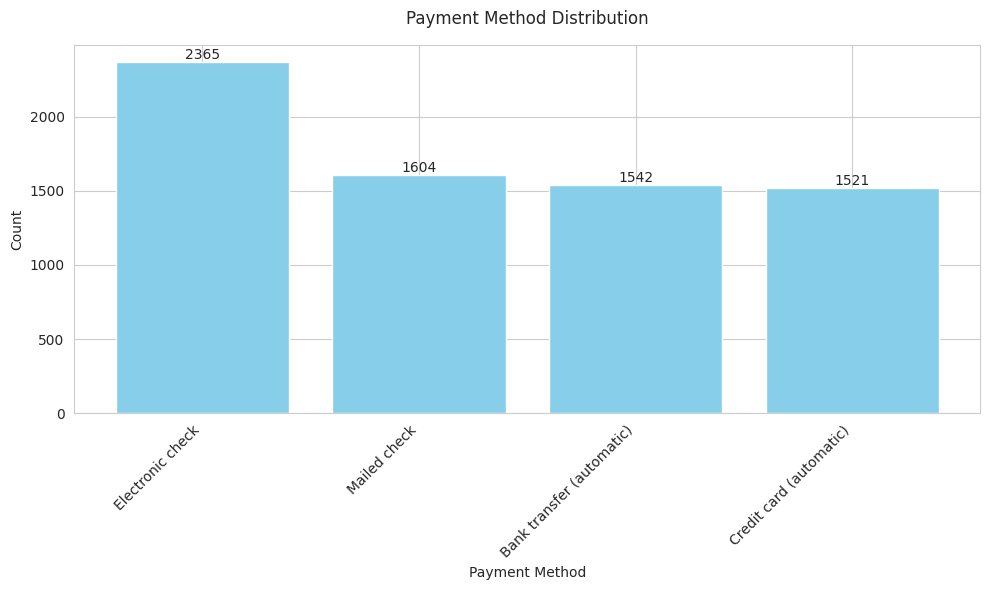

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

values = df['PaymentMethod'].value_counts()

# Создание столбачтого графика
bars = plt.bar(values.index, values.values, color='skyblue')

plt.title('Payment Method Distribution', fontsize=12, pad=15)
plt.xlabel('Payment Method')
plt.ylabel('Count')

# Поворачивание надписи по оси x для лучшей читаемости
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()

plt.show()

In [ ]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,992
Fiber optic,No,910
No,No,717
Fiber optic,Yes,633
DSL,Yes,240
No,Yes,57


In [ ]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,965
Fiber optic,No,889
No,No,690
Fiber optic,Yes,664
DSL,Yes,219
No,Yes,56


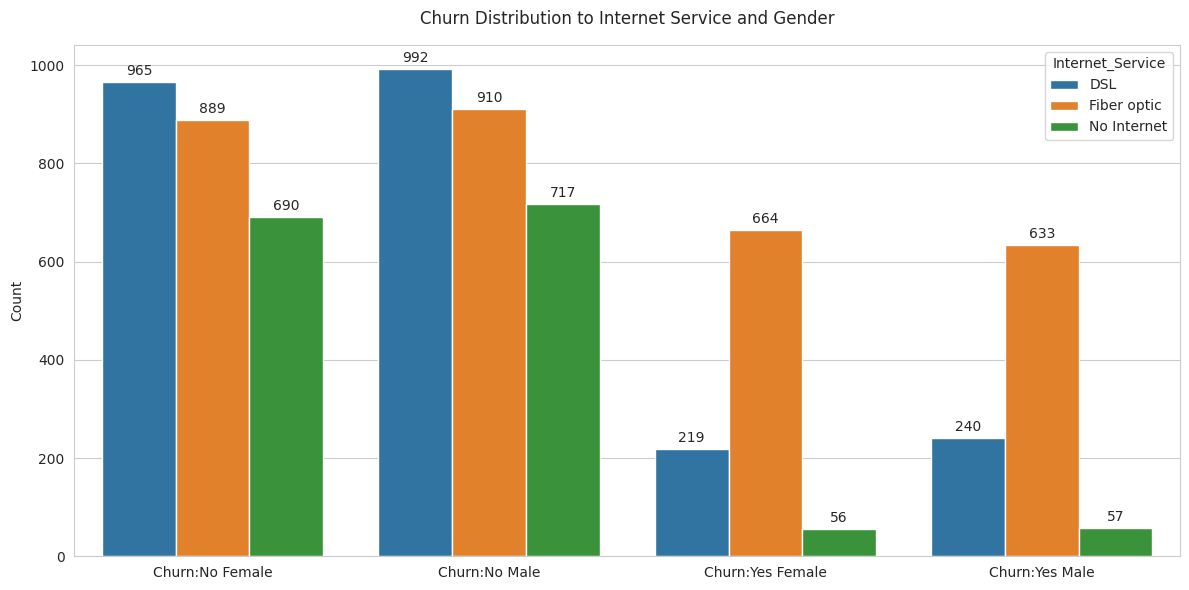

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Создание датафрейма для данных
data = {
    'Category': ['Churn:No Female']*3 + ['Churn:No Male']*3 +
                ['Churn:Yes Female']*3 + ['Churn:Yes Male']*3,
    'Internet_Service': ['DSL', 'Fiber optic', 'No Internet']*4,
    'Count': [965, 889, 690, 992, 910, 717, 219, 664, 56, 240, 633, 57]
}
df_plot = pd.DataFrame(data)

plt.figure(figsize=(12, 6))

# Создание сгруппированной столбчатой диаграммы
sns.barplot(x='Category', y='Count', hue='Internet_Service', data=df_plot)

plt.title('Churn Distribution to Internet Service and Gender', fontsize=12, pad=15)
plt.xlabel('')
plt.ylabel('Count')

# Поворачиваем для лучшей читабельности
plt.xticks(rotation=0)

for container in plt.gca().containers:
    plt.gca().bar_label(container, padding=3)

plt.tight_layout()

plt.show()

<Figure size 1000x700 with 0 Axes>

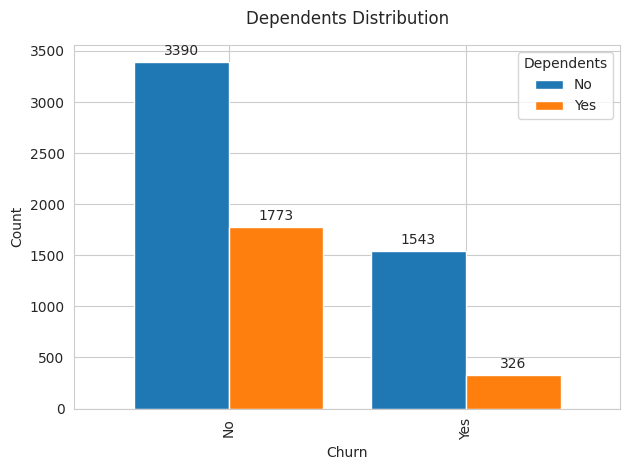

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Создание сгруппированных столбцов
dependents_churn = df.groupby(['Churn', 'Dependents']).size().unstack()

dependents_churn.plot(kind='bar', width=0.8)

plt.title('Dependents Distribution', fontsize=12, pad=15)
plt.xlabel('Churn')
plt.ylabel('Count')

for i, container in enumerate(plt.gca().containers):
    plt.bar_label(container, padding=3)

plt.tight_layout()
plt.legend(title='Dependents')

plt.show()

In [ ]:
#создаем Churn Distribution но используя plotly express для большего удобства
color_map = {"Yes": '#FF97FF', "No": '#AB63FA'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Churn distribution to Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": '#FF97FF', "No": '#AB63FA'}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn distribution to Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": '#FF97FF', "No": '#AB63FA'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling", barmode="group", title="<b>Churn distribution to Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

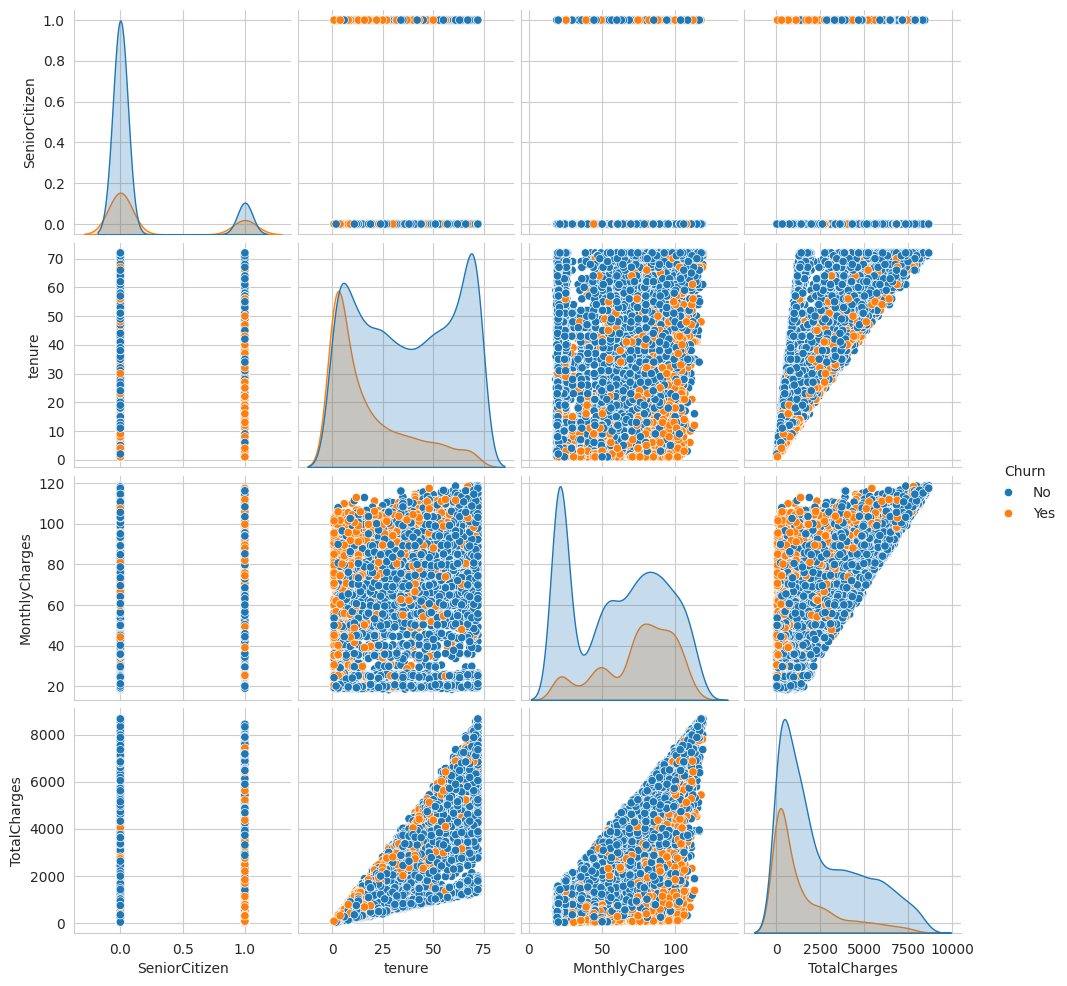

In [ ]:
sns.pairplot(df, hue='Churn')
plt.show()

In [ ]:
#меняем значения на 0 и 1
df['gender'] = df['gender'].replace({"Male": 1 , "Female": 0})
df['Partner'] = df['Partner'].replace({"Yes": 1 , "No": 0})
df['Dependents'] = df['Dependents'].replace({"Yes": 1 , "No": 0})
df['PhoneService'] = df['PhoneService'].replace({"Yes": 1 , "No": 0})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({"Yes": 1 , "No": 0})
df['OnlineBackup'] = df['OnlineBackup'].replace({"Yes": 1 , "No": 0})
df['DeviceProtection'] = df['DeviceProtection'].replace({"Yes": 1 , "No": 0})
df['TechSupport'] = df['TechSupport'].replace({"Yes": 1 , "No": 0})
df['StreamingTV'] = df['StreamingTV'].replace({"Yes": 1 , "No": 0})
df['StreamingMovies'] = df['StreamingMovies'].replace({"Yes": 1 , "No": 0})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({"Yes": 1 , "No": 0})
df['Churn'] = df['Churn'].replace({"Yes": 1 , "No": 0})

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 
 17  

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = dataframe_series.astype(str)
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

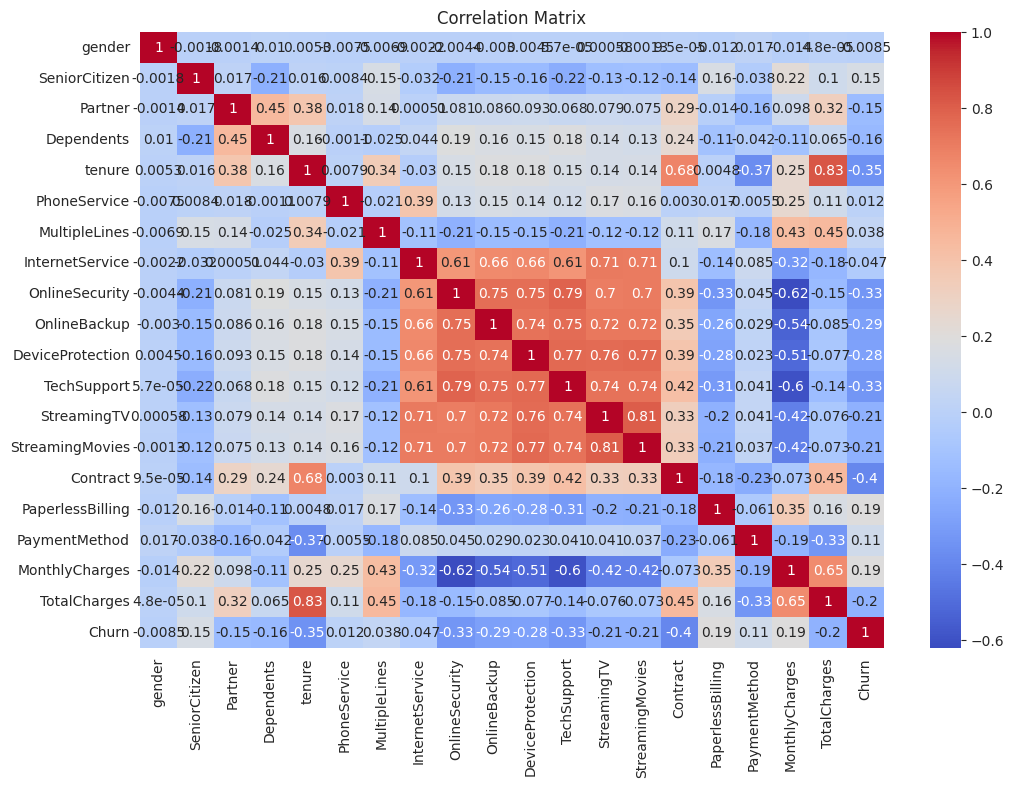

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('Churn', axis=1)
y = df['Churn']

# Разделение данных с помощью стратификации
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y        # Стратификация на основе значений оттока
)

# Формы результирующих наборов данных
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Проверка распределения оттока в обоих наборах
print("\nChurn distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nChurn distribution in testing set:")
print(y_test.value_counts(normalize=True))

Training set shape: (5625, 19)
Testing set shape: (1407, 19)

Churn distribution in training set:
Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64

Churn distribution in testing set:
Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64


In [ ]:
num_columns = ["tenure", 'MonthlyCharges', 'TotalCharges']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,1,0,1,1,1.321816,1,2,1,1,1,1,1,0,0,2,0,1,0.981556,1.659900
7003,1,0,0,0,-0.267410,0,1,0,0,0,1,1,0,0,0,0,2,-0.971546,-0.562252
3355,0,0,1,0,1.444064,1,2,1,0,1,1,1,0,0,2,0,1,0.837066,1.756104
4494,1,0,0,0,-1.204646,1,0,1,0,1,0,0,0,1,0,0,2,0.641092,-0.908326
3541,0,0,1,0,0.669826,0,1,0,1,0,0,0,1,0,0,0,0,-0.808787,-0.101561


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train.values)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test.values)

# Define the improved neural network
class ImprovedNN(nn.Module):
    def __init__(self, input_dim):
        super(ImprovedNN, self).__init__()

        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        #self.dropout1 = nn.Dropout(0.4)

        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        #self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        #self.dropout3 = nn.Dropout(0.2)

        self.fc4 = nn.Linear(32, 16)
        self.bn4 = nn.BatchNorm1d(16)
        #self.dropout4 = nn.Dropout(0.1)

        self.fc5 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        #x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        #x = self.dropout2(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = torch.relu(x)
        #x = self.dropout3(x)

        x = self.fc4(x)
        x = self.bn4(x)
        x = torch.relu(x)
        #x = self.dropout4(x)

        x = self.fc5(x)

        x = torch.sigmoid(x)

        return x

In [ ]:
input_dim = X_train.shape[1]
model = ImprovedNN(input_dim)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

batch_size = 32

# Создание загрузчика данных для пакетной обработки
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=False)


In [ ]:
#тренировка модели на 200 эпохах
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.unsqueeze(1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Вывод прогресс каждые 10 эпох
    if (epoch + 1) % 10 == 0:
        avg_loss = total_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

Epoch [10/200], Loss: 0.0022
Epoch [20/200], Loss: 0.0030
Epoch [30/200], Loss: 0.0034
Epoch [40/200], Loss: 0.0063
Epoch [50/200], Loss: 0.0025
Epoch [60/200], Loss: 0.0027
Epoch [70/200], Loss: 0.0028
Epoch [80/200], Loss: 0.0029
Epoch [90/200], Loss: 0.0023
Epoch [100/200], Loss: 0.0027
Epoch [110/200], Loss: 0.0022
Epoch [120/200], Loss: 0.0027
Epoch [130/200], Loss: 0.0044
Epoch [140/200], Loss: 0.0023
Epoch [150/200], Loss: 0.0022
Epoch [160/200], Loss: 0.0043
Epoch [170/200], Loss: 0.0024
Epoch [180/200], Loss: 0.0021
Epoch [190/200], Loss: 0.0027
Epoch [200/200], Loss: 0.0020


In [ ]:
model.eval()  # Установление модели в режим оценки
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor.unsqueeze(1))
print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.2181


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Оценка
model.eval()
with torch.no_grad():
    # Берем предикты
    y_pred = model(X_test_tensor)
    y_pred_class = (y_pred > 0.5).float().squeeze().numpy()
    y_test_numpy = y_test_tensor.numpy()

    # Высчитываем метрики
    accuracy = accuracy_score(y_test_numpy, y_pred_class)
    precision = precision_score(y_test_numpy, y_pred_class)
    recall = recall_score(y_test_numpy, y_pred_class)
    f1_macro = f1_score(y_test_numpy, y_pred_class, average='macro')

    # Выводим все метрики
    print('\nModel Evaluation Metrics:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Macro Score: {f1_macro:.4f}')


Model Evaluation Metrics:
Accuracy: 0.7584
Precision: 0.5478
Recall: 0.5214
F1 Macro Score: 0.6855


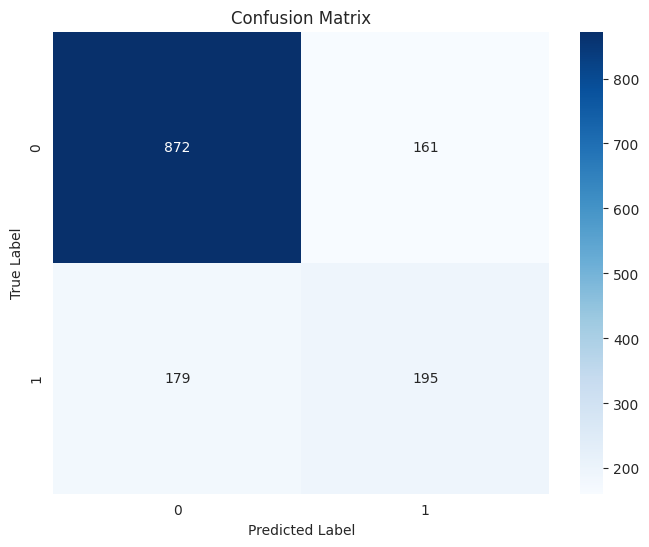


Detailed Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84      1033
         1.0       0.55      0.52      0.53       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.69      1407
weighted avg       0.75      0.76      0.76      1407



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Создаем confusion matrix
cm = confusion_matrix(y_test_numpy, y_pred_class)

# Рисуем confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Выводим classification report
from sklearn.metrics import classification_report
print('\nDetailed Classification Report:')
print(classification_report(y_test_numpy, y_pred_class))

Взяв на усмотрение теоретические улучшение, которые можно было бы использовать была создана новая архитектура и модель была по новому обучена, в результате F1 Macro Score увеличился почти 5 процентов

In [ ]:
# Импортируем нужные библиотеки
from imblearn.over_sampling import SMOTE


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train.values)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test.values)
class EnhancedNN(nn.Module):
    def __init__(self):
        super(EnhancedNN, self).__init__()

        self.fc1 = nn.Linear(19, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.4)

        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.4)

        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.3)

        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        x = torch.sigmoid(self.fc4(x))
        return x

# Используем SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Преобразование в тензоры
X_train_tensor = torch.FloatTensor(X_train_balanced)
y_train_tensor = torch.FloatTensor(y_train_balanced)

# Инициализация модели и обучающих компонентов
model = EnhancedNN()
pos_weight = torch.FloatTensor([len(y_train[y_train==0]) / len(y_train[y_train==1])])
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

In [ ]:
# Цикл обучения с валидацией и ранней остановкой
best_f1 = 0
patience = 10
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for i in range(0, len(X_train), batch_size):
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.unsqueeze(1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Этап валидации
    model.eval()
    with torch.no_grad():
        val_pred = model(X_test_tensor)
        val_pred_class = (val_pred.squeeze() > 0.5).float()
        f1 = f1_score(y_test_tensor, val_pred_class, average='macro')

        if f1 > best_f1:
            best_f1 = f1
            torch.save(model.state_dict(), 'best_model.pth')
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break

        scheduler.step(total_loss)

Early stopping triggered


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Оценка
model.eval()
with torch.no_grad():
    # Берем предикты
    y_pred = model(X_test_tensor)
    y_pred_class = (y_pred > 0.5).float().squeeze().numpy()
    y_test_numpy = y_test_tensor.numpy()

    # Высчитываем метрики
    accuracy = accuracy_score(y_test_numpy, y_pred_class)
    precision = precision_score(y_test_numpy, y_pred_class)
    recall = recall_score(y_test_numpy, y_pred_class)
    f1_macro = f1_score(y_test_numpy, y_pred_class, average='macro')

    # Выводим все метрики
    print('\nModel Evaluation Metrics:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Macro Score: {f1_macro:.4f}')


Model Evaluation Metrics:
Accuracy: 0.7825
Precision: 0.5813
Recall: 0.6497
F1 Macro Score: 0.7312


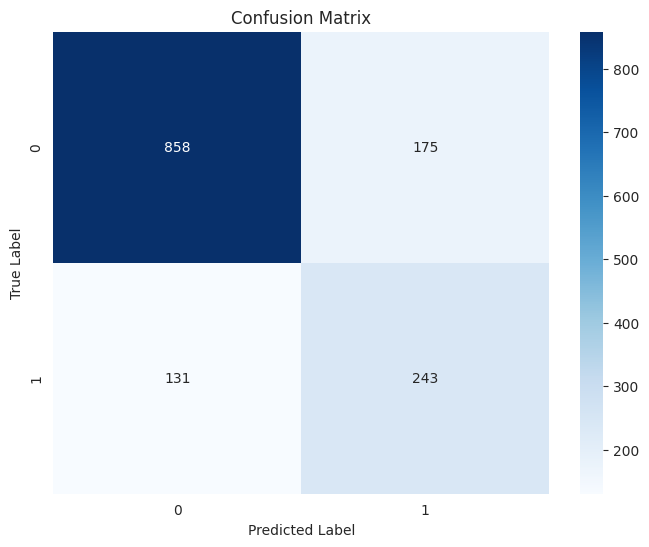


Detailed Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      1033
         1.0       0.58      0.65      0.61       374

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.79      1407



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Создаем confusion matrix
cm = confusion_matrix(y_test_numpy, y_pred_class)

# Рисуем confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Выводим classification report
from sklearn.metrics import classification_report
print('\nDetailed Classification Report:')
print(classification_report(y_test_numpy, y_pred_class))